In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from datetime import datetime, timedelta
# plt.style.use('science')

Read Data


In [2]:
color1 = ["#2878b5", "#9ac9db", "#f8ac8c", "#c82423", "#ff8884"]
color2 = ["#4878d0", "#d65f5f", "#6acc64", "#b47cc7", "#c4ad66", "gray"]
categories = ['Category A', 'Category B', 'Category C', 'Category D']

data1 = np.random.rand(len(categories))
data2 = np.random.rand(len(categories))
data3 = np.random.rand(len(categories))
data4 = np.random.rand(len(categories))
data5 = np.random.rand(len(categories))

horizons = range(0, len(data1), 1)

In [3]:
def slot_to_time(slot):
    # Calculate the number of days and the slot within that day.
    days_passed = slot // 36
    slot_in_day = slot % 36

    # Calculate the hour and minute based on the slot_in_day.
    hour = 6 + slot_in_day // 2
    minute = (slot_in_day % 2) * 30

    # Add the days_passed to the starting date (2016-01-01).
    date = datetime(2016, 1, 1) + timedelta(days=days_passed)
    date_str = date.strftime('%Y-%m-%d')

    return f"{date_str} {hour:02d}:{minute:02d}"


def plot_bar(categories, *data, colors, inset_ranges=None):
    plt.figure(figsize=(10, 6))
    plt.grid(visible=True, which='major', linestyle='-')
    plt.grid(visible=True, which='minor', linestyle='--', alpha=0.5)
    plt.minorticks_on()

    if inset_ranges:
        count = 0
        for inset_range in inset_ranges:
            plt.axvspan(inset_range[0], inset_range[1],
                        color='yellow', alpha=0.2)
            period_x = (inset_range[0] + inset_range[1]) / 2
            plt.text(period_x, plt.ylim()[
                     0], f'Period {count + 1}', ha='center', va='bottom', fontsize=10, color='black')
            count += 1

    bar_width = 0.15
    num_datasets = len(data)
    bar_positions = [np.arange(len(categories)) +
                     i * bar_width for i in range(num_datasets)]

    for i, dataset in enumerate(data):
        plt.bar(bar_positions[i], dataset,
                color=colors[i], width=bar_width, label=f'Data {i+1}', edgecolor='black')

    bar_centers = np.mean(bar_positions, axis=0)
    plt.xticks(bar_centers, categories, fontsize=10)

    # for i, dataset in enumerate(data):
    #     plt.plot(bar_positions[i], dataset, 'o--',
    #              label=f'Data {i+1} Line', color=colors[i])

    plt.xlabel('Category')
    plt.ylabel('Value')
    plt.title('Title')

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(loc='upper right', frameon=True, edgecolor='black',
               framealpha=0.5, borderaxespad=0.5, fontsize=10)

    plt.rcParams["font.size"] = 14
    plt.show()
    plt.close()


def plot_line(horizons, *data, data_name=None, colors, title='Title', y_name='Arrival Delay Time (min)', x_name='Time Step (30 min)', inset_ranges=None, width=1.7, size=7):
    plt.figure(figsize=(16, 10))

    plt.rcParams["font.family"] = "Times New Roman"  # 修改字体为Times New Roman
    plt.rcParams["font.size"] = 14
    plt.grid(visible=True, which='major', linestyle='-')
    plt.grid(visible=True, which='minor', linestyle='--', alpha=0.3)
    plt.minorticks_on()

    for i, dataset in enumerate(data):
        if data_name[i] == 'Truth':
            plt.plot(horizons, dataset, marker='s^odx'[
                     i], markersize=size, linestyle='-', label=data_name[i], color=colors[i], linewidth=width + 0.5, alpha=0.8)
        elif (data_name[i] == 'ASTGCN'):
            plt.plot(horizons, dataset, marker='s^odx'[
                     i], markersize=size, linestyle='-', label=data_name[i], color=colors[i], linewidth=width + 1)
        else:
            plt.plot(horizons, dataset, marker='s^odx*D'[
                i], markersize=size, linestyle='--', label=data_name[i], color=colors[i], linewidth=width, alpha=0.6)

    if inset_ranges:
        count = 0
        for inset_range in inset_ranges:
            plt.axvspan(inset_range[0], inset_range[1],
                        color='yellow', alpha=0.2)
            period_x = (inset_range[0] + inset_range[1]) / 2
            plt.text(period_x, plt.ylim()[
                     0], f'Period {count + 1}', ha='center', va='bottom', fontsize=10, color='black')
            count += 1

    plt.title(title)
    plt.xlabel(x_name)
    plt.ylabel(y_name)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

    plt.legend(loc='upper left', frameon=True, edgecolor='black',
               framealpha=0.5, borderaxespad=0.5, fontsize=10)

    # plt.ylim(-15, 35)

    plt.show()
    plt.close()

Draw


['true_47359', 'STCGAT', 'STPN', 'GAT', 'ASTGCN']


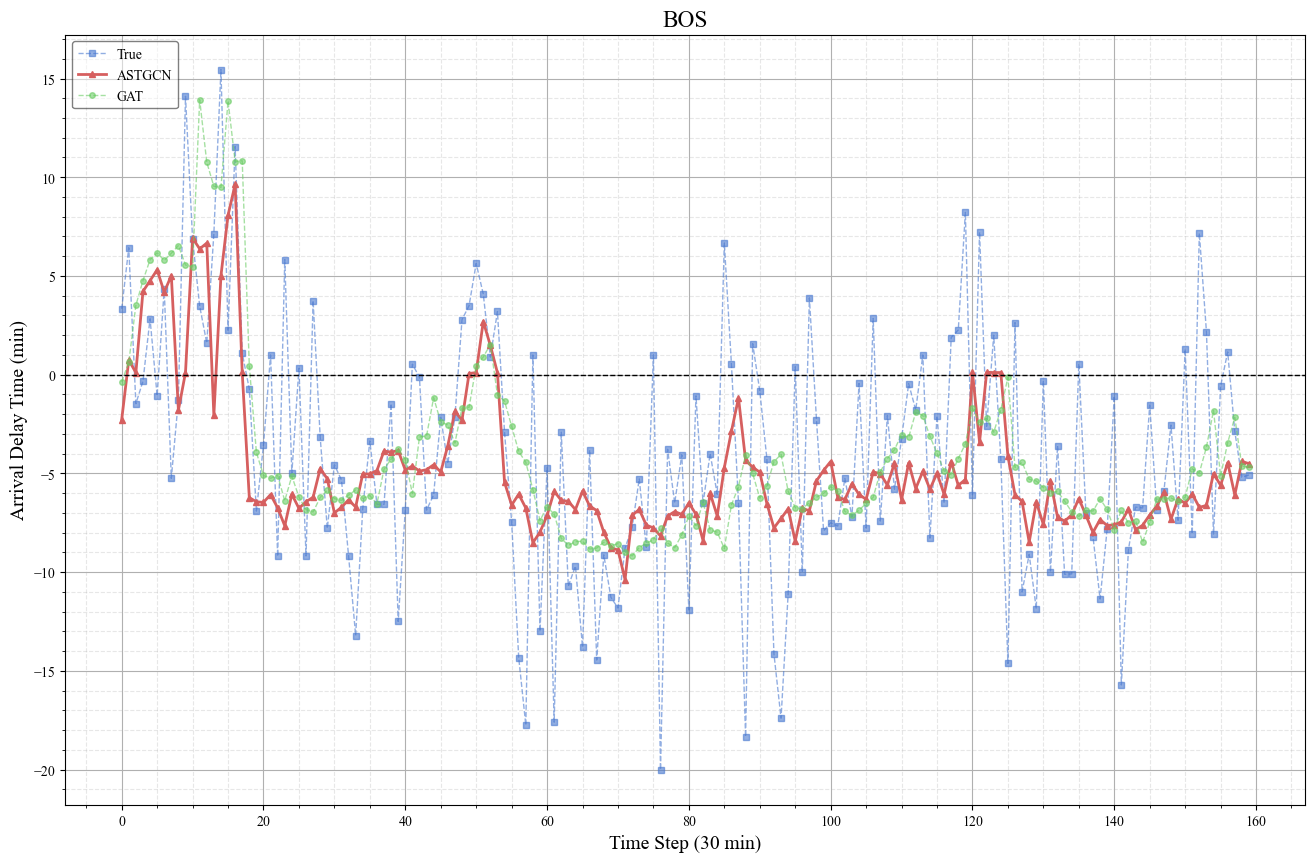

In [4]:
data = np.load('udata/us_baseline_data.npz')
print(data.files)
length = 160
x_ax = range(0, length, 1)
idx = 8

data_ture = data['true_47359'][idx, :, 0]
data_STCGAT = data['STCGAT'][:, idx, 0, 0]  # -2
data_STPN = data['STPN'][:, idx, 0, 0]  # -1
data_GAT = data['GAT'][:, idx, 0]
data_ASTGCN = data['ASTGCN'][:, idx, 0]

plot_line(x_ax, data_ture, data_GAT, data_ASTGCN, data_name=['True', 'ASTGCN', 'GAT'],
          colors=color2, title='BOS', y_name='Arrival Delay Time (min)', x_name='Time Step (30 min)', inset_ranges=None, width=1, size=4)

In [5]:
start_time = 47359
print(slot_to_time(start_time))

2019-08-08 15:30


['true_47359', 'STCGAT', 'STPN', 'GAT', 'ASTGCN']


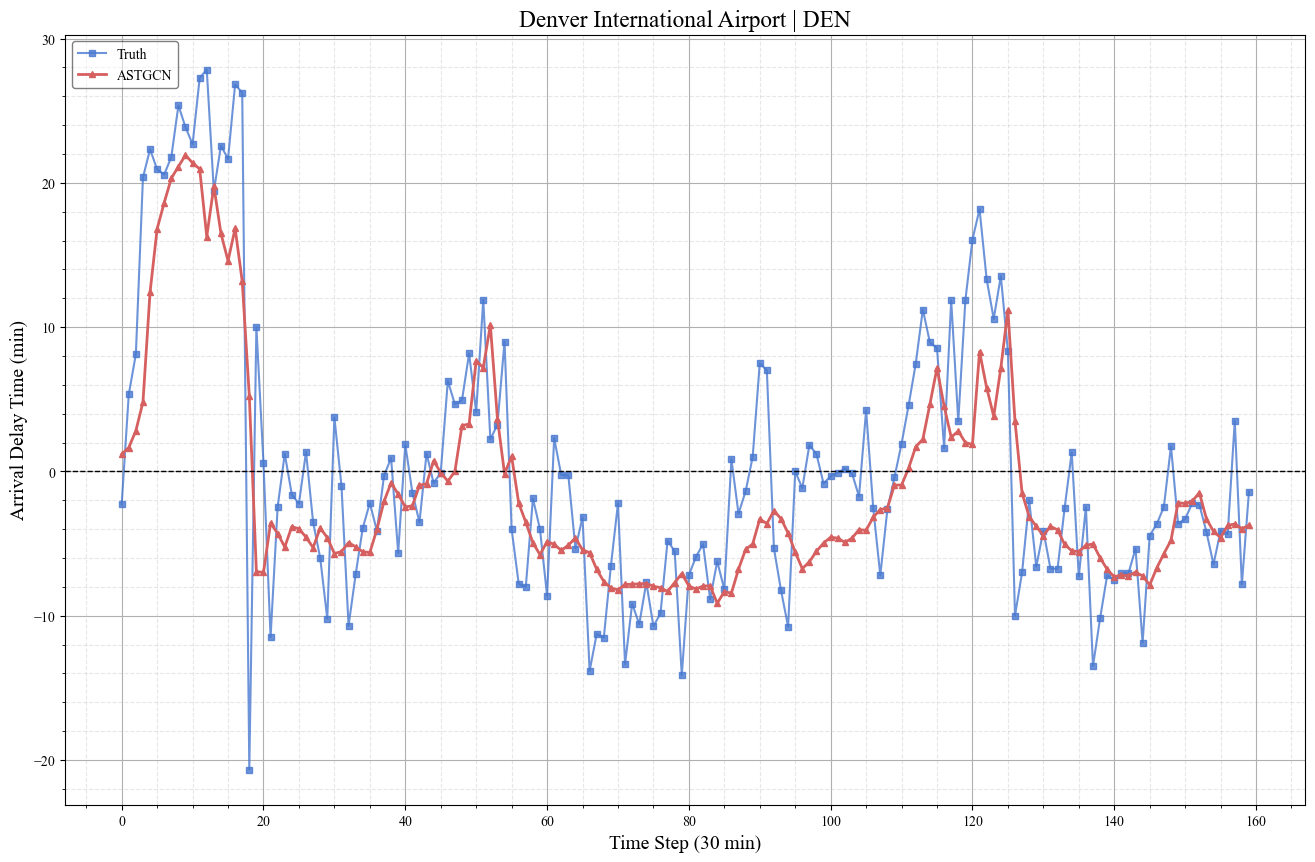

In [6]:
data = np.load('udata/us_baseline_data.npz')
print(data.files)
length = 160
x_ax = range(0, length, 1)
idx = 3

data_ture = data['true_47359'][idx, :, 0]
data_STCGAT = data['STCGAT'][:, idx, 0, 0]  # -2
data_STPN = data['STPN'][:, idx, 0, 0]  # -1
data_GAT = data['GAT'][:, idx, 0]
data_ASTGCN = data['ASTGCN'][:, idx, 0]

plot_line(x_ax, data_ture, data_ASTGCN, data_name=['Truth', 'ASTGCN'],
          colors=color2, title='Denver International Airport | DEN', y_name='Arrival Delay Time (min)', x_name='Time Step (30 min)', inset_ranges=None, width=1, size=4)